In [42]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = np.ones(10), 1
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.ones(X.shape[1])
        self.bias = 1
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            print("y_hat",y_hat)
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            print("loss is ", self.loss)
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            print("partial_w:",partial_w)
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            print("partial_d:",partial_d)
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        print("Weights and bias are " ,self.weights, self.bias)
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

In [43]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target

In [44]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

y_hat [1.29436843 0.99983712 1.0708801  0.55913092 0.59611577 0.55430684
 1.0315673  1.34713952 0.91054627 0.73178505 0.83076498 1.17066369
 0.61041759 1.21488782 0.64088301 1.18578414 0.48160214 0.9864585
 1.08383246 1.28396872 0.82617677 1.02223536 1.15738353 1.23157839
 1.29888497 1.1795406  0.86682653 0.74612614 0.88424213 0.58572032
 0.99564147 0.86230691 0.76769236 0.82769043 1.16089986 0.97511968
 1.12418565 1.02716978 0.70713781 1.07577766 0.4609994  1.3862727
 0.77659186 1.06813435 1.11103456 1.31141692 1.14444174 1.25159128
 1.12965224 0.81369326 1.23335716 0.59400905 1.48889568 1.48095659
 0.65329025 1.24676931 1.3099032  0.99467349 1.24506971 1.23487474
 1.19677411 1.21852418 0.94493027 1.03462285 1.33483793 0.89539175
 1.04983026 0.65952825 1.03015245 1.29547132 1.2455092  0.90238309
 0.65883555 0.75066614 0.90953444 1.06571324 1.03678892 1.00176337
 0.59615082 0.84400521 0.97042814 1.06394342 0.64468614 0.86459795
 1.05016005 1.02819188 1.45908053 1.11434332 1.22749262 1.

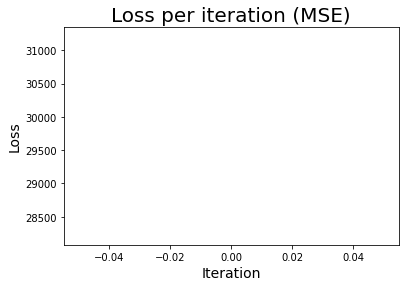

In [34]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

partial_w: [-1.86081167 -0.10932439 -4.98456952 -3.71875091 -1.31370059 -0.90096535
  3.11643901 -3.2784867  -4.48542634 -3.52161783]
partial_d: -307.4730878186969
Weights and bias are  [ 0.93040584  0.05466219  2.49228476  1.85937545  0.6568503   0.45048268
 -1.55821951  1.63924335  2.24271317  1.76080892] 153.73654390934846
partial_w: [-1.86081167 -0.10932439 -4.98456952 -3.71875091 -1.31370059 -0.90096535
  3.11643901 -3.2784867  -4.48542634 -3.52161783]
partial_d: -307.4730878186969
Weights and bias are  [ 0.18608117  0.01093244  0.49845695  0.37187509  0.13137006  0.09009654
 -0.3116439   0.32784867  0.44854263  0.35216178] 30.74730878186969
partial_w: [-1.86081167 -0.10932439 -4.98456952 -3.71875091 -1.31370059 -0.90096535
  3.11643901 -3.2784867  -4.48542634 -3.52161783]
partial_d: -307.4730878186969
Weights and bias are  [ 0.01860812  0.00109324  0.0498457   0.03718751  0.01313701  0.00900965
 -0.03116439  0.03278487  0.04485426  0.03521618] 3.074730878186969
partial_w: [-1.860

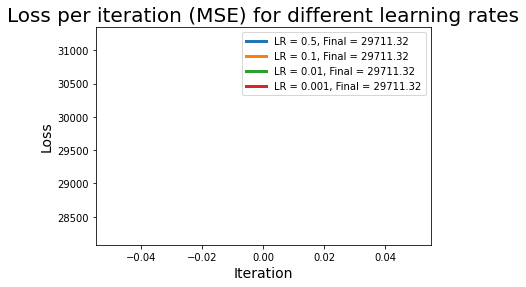

In [35]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(learning_rate=lr)
    model.fit(X_train, y_train)
    losses[f'LR={str(lr)}'] = model.loss
    
    
xs = np.arange(len(model.loss))

plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
plt.title('Loss per iteration (MSE) for different learning rates', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

In [24]:
model = LinearRegression(learning_rate=0.5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

model._mean_squared_error(y_test, preds)

Weights and bias are  [ 44.00127338 -14.11458123 169.22565641 124.02679789  34.49171277
  19.86105276 -99.16898987 100.8778842  147.46810982  97.28337662] 152.77836550052731


3501.717157134028

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

mean_squared_error(y_test, lr_preds)

2900.1732878832318